In [6]:

from sqlalchemy import create_engine
engine = create_engine('postgresql://<user>:<password>@localhost:5432/sql_challenge')
connection = engine.connect()

In [8]:
import pandas as pd
salaries_df = pd.read_sql("SELECT * FROM salaries", connection)
salaries_df

,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0
...,...,...
300019,499995,40000.0
300020,499996,58058.0
300021,499997,49597.0
300022,499998,40000.0


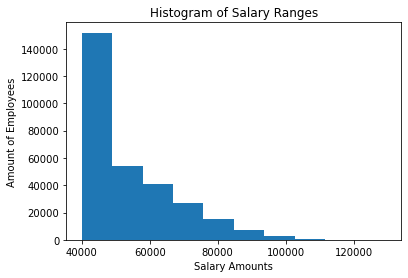

In [13]:
import matplotlib.pyplot as plt

plt.hist(salaries_df['salary'], bins = 10)
plt.ylabel('Amount of Employees')
plt.xlabel('Salary Amounts')
plt.title("Histogram of Salary Ranges")
plt.show()


In [14]:
employees_df = pd.read_sql("SELECT * FROM employees", connection)
employees_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,9/22/1959,Percy,Samarati,F,1994-09-08


In [15]:
employee_salary = employees_df.merge(salaries_df,on='emp_no')
employee_salary

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28,40000.0
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07,53422.0
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21,48973.0
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26,40000.0
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1991-01-18,40000.0
...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,1988-10-28,69696.0
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,1995-02-26,75355.0
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,1988-02-24,61886.0
300022,264920,s0001,9/22/1959,Percy,Samarati,F,1994-09-08,62772.0


In [22]:
title_groupby = employee_salary.groupby('emp_title_id')
avg_salary_by_title = title_groupby['salary'].mean().reset_index()
avg_salary_by_title = avg_salary_by_title.rename(columns={"emp_title_id": "title_id"})
avg_salary_by_title

,title_id,salary
0,e0001,48564.434447
1,e0002,48535.336511
2,e0003,48506.799871
3,e0004,48582.896092
4,m0001,51531.041667
5,s0001,58465.382850
6,s0002,58550.172704


In [20]:
titles_df = pd.read_sql("SELECT * FROM titles", connection)
titles_df

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [23]:
avg_salary_by_title = avg_salary_by_title.merge(titles_df, on='title_id')
avg_salary_by_title

,title_id,salary,title
0,e0001,48564.434447,Assistant Engineer
1,e0002,48535.336511,Engineer
2,e0003,48506.799871,Senior Engineer
3,e0004,48582.896092,Technique Leader
4,m0001,51531.041667,Manager
5,s0001,58465.382850,Staff
6,s0002,58550.172704,Senior Staff


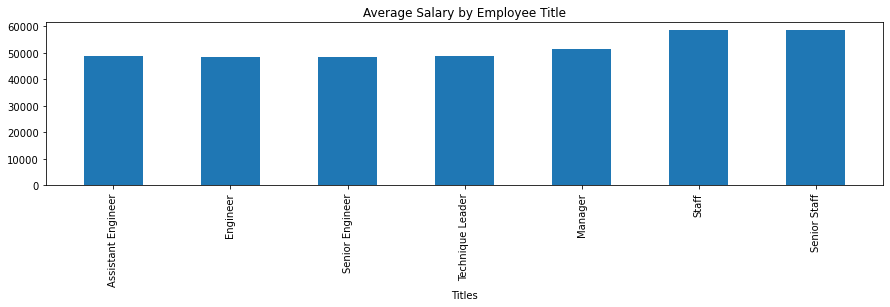

In [27]:
tick_locations = [value for value in avg_salary_by_title['title']]
plt.figure(figsize=(15,3))
plt.bar(avg_salary_by_title['title'],avg_salary_by_title['salary'],color='tab:blue', align="center",width=0.5)
plt.xticks(tick_locations, avg_salary_by_title['title'], rotation="vertical")
plt.title("Average Salary by Employee Title")
plt.xlabel("Titles")
plt.show()

In [29]:
#Epilogue says to search your ID number, which is 499942

myid = pd.read_sql("SELECT * FROM employees where emp_no = 499942", connection)
myid

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1/10/1963,April,Foolsday,F,1997-02-10
